In [1]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro
from scipy.stats import kstest, norm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
etl_data = pd.read_csv("lc_db_đã xóa cột.csv")

etl_data['term'] = etl_data['term'].replace(' 36 months', '36 months')
etl_data['term'] = etl_data['term'].replace(' 60 months', '60 months')

etl_data['loan_status'] = etl_data['loan_status'].replace('Does not meet the credit policy. Status:Fully Paid', 'Fully Paid')
etl_data['loan_status'] = etl_data['loan_status'].replace('Does not meet the credit policy. Status:Charged Off', 'Charged Off')


In [10]:
etl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           759338 non-null  int64  
 1   member_id                    0 non-null       float64
 2   loan_amnt                    759338 non-null  int64  
 3   funded_amnt                  759338 non-null  int64  
 4   funded_amnt_inv              759338 non-null  float64
 5   term                         759338 non-null  object 
 6   int_rate                     759338 non-null  float64
 7   installment                  759338 non-null  float64
 8   grade                        759338 non-null  object 
 9   sub_grade                    759338 non-null  object 
 10  emp_title                    708368 non-null  object 
 11  emp_length                   708975 non-null  object 
 12  home_ownership               759338 non-null  object 
 13 

## Sum

In [97]:
print(etl_data['loan_amnt'].sum())
print(etl_data['funded_amnt'].sum())
print(etl_data['total_pymnt'].sum())

24261684600.0
24249777275.0
12021966953.485794


## loan_amnt & funded_amnt

In [ ]:
etl_data['loan_amnt'].hist(bins=50, figsize=(8,4), color ='salmon', edgecolor='black')

plt.title('loan_amnt')

plt.show()

In [ ]:
etl_data['funded_amnt'].hist(bins=50, figsize=(8,4), edgecolor='black')

plt.title('funded_amnt')

plt.show()

In [ ]:
print((etl_data['loan_amnt'] - etl_data['funded_amnt'] != 0).sum())

## int_rate & term

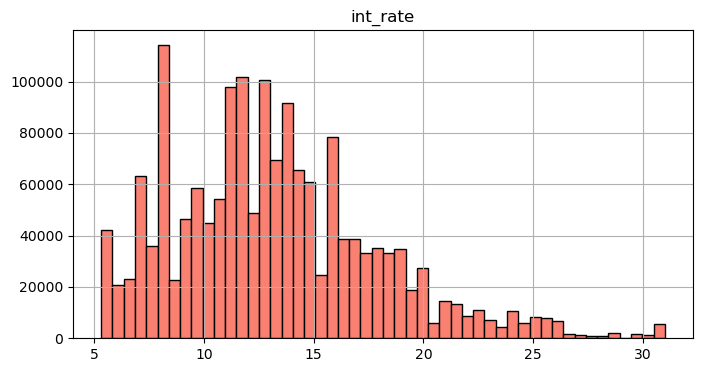

In [3]:
etl_data['int_rate'].hist(bins=50, figsize=(8,4), color ='salmon', edgecolor='black')

plt.title('int_rate')

plt.show()

In [4]:
print((etl_data['term'] == "36 months").sum())
print((etl_data['term'] == "60 months").sum())

1182362
464355


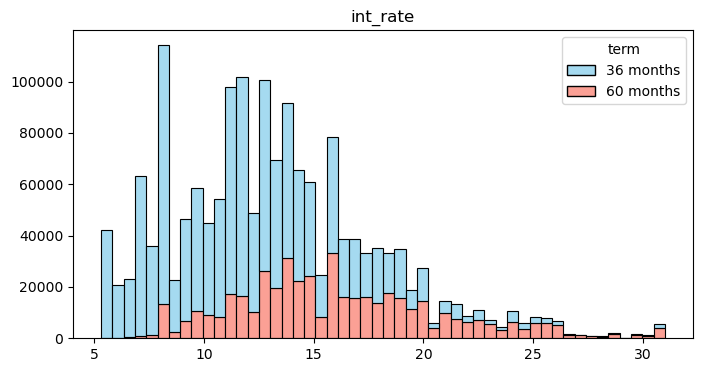

In [5]:
custom_palette = {'36 months': 'skyblue', '60 months': 'salmon'}

plt.figure(figsize=(8, 4))
sns.histplot(data=etl_data, x='int_rate', hue='term', multiple='stack', bins=50, palette=custom_palette)

plt.title('int_rate')
plt.xlabel('')
plt.ylabel('')

plt.show()

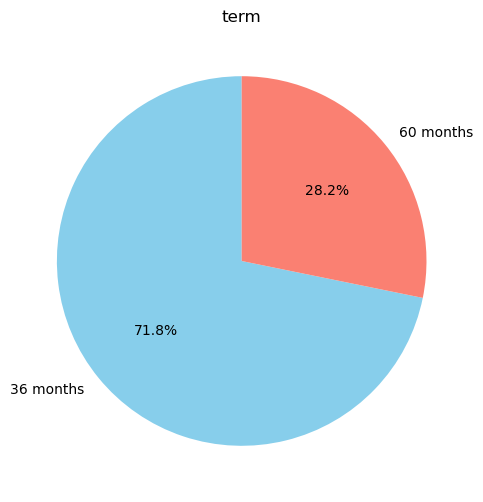

In [64]:
# Đếm số lượng kỳ hạn
term_counts = etl_data['term'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(6, 6))
plt.pie(term_counts, labels=term_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('term')
plt.show()

## dti

In [ ]:
etl_data['dti'].hist(bins=50, figsize=(8,4), color ='salmon', edgecolor='black')

plt.title('dti')

plt.show()

In [ ]:
print(max(etl_data['dti']))

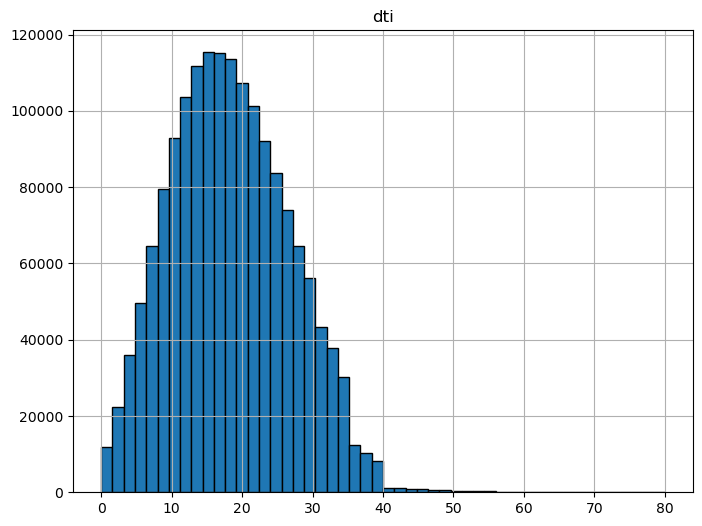

In [4]:
etl_data['dti'].hist(bins=50, figsize=(8,6), edgecolor='black', range=(0,80))

plt.title('dti')

plt.show()

In [ ]:
print(etl_data['dti'].mean())
print(etl_data['dti'].std())

In [5]:
print((etl_data['dti'] > 100).sum())

645


## total_pymnt

In [ ]:
etl_data['total_pymnt'].hist(bins=50, figsize=(8,4), color='salmon', edgecolor='black')

plt.title('total_pymnt')

plt.show()

## Describe

In [ ]:
etl_data[['loan_amnt', 'int_rate', 'dti', 'total_pymnt']].describe()

## grade

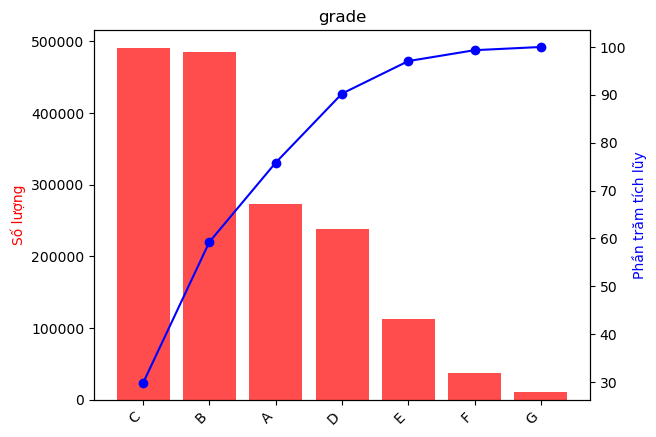

In [23]:
credit_counts = etl_data['grade'].value_counts()

# Sắp xếp DataFrame theo số lượng giảm dần
credit_counts = credit_counts.sort_values(ascending=False)

# Tính tổng số lượng
total = credit_counts.sum()

# Tính tổng tích lũy
cumulative_counts = credit_counts.cumsum()

# Tính phần trăm tích lũy
cumulative_percentage = (cumulative_counts / total) * 100

# Vẽ Pareto chart
fig, ax1 = plt.subplots()

# Vẽ cột cho số lượng
ax1.bar(credit_counts.index, credit_counts, color='r', alpha=0.7, align='center')

# Tạo trục phụ để vẽ đường tích lũy
ax2 = ax1.twinx()
ax2.plot(credit_counts.index, cumulative_percentage, color='b', marker='o')

# Đặt giảm kích thước font cho các nhãn trục
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha="right", fontsize=10)
plt.setp(ax2.yaxis.get_majorticklabels(), fontsize=10)

# Thiết lập nhãn và tiêu đề
ax1.set_ylabel('Số lượng', color='r')
ax2.set_ylabel('Phần trăm tích lũy', color='b')
plt.title('grade')

plt.show()

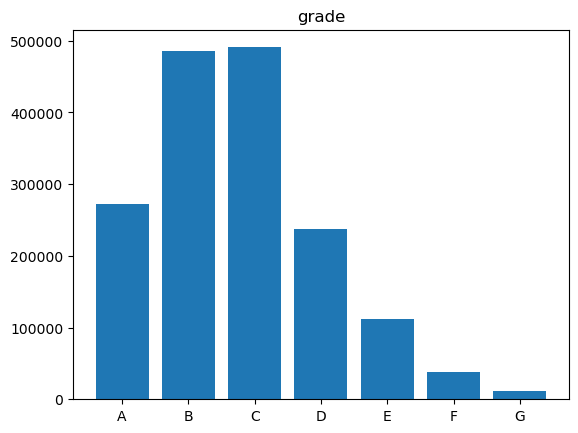

In [21]:
# Tính tần suất xuất hiện của mỗi giá trị
value_counts = etl_data['grade'].value_counts()

# Sắp xếp theo thứ tự A, B, C, D, E, F, G
order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
value_counts = value_counts.reindex(order)

# Vẽ biểu đồ cột
plt.bar(value_counts.index, value_counts)
plt.title('grade')
plt.show()

## Correlation

In [29]:
# Ma trận tương quan
corr_matrix = etl_data[['loan_amnt', 'funded_amnt', 'int_rate', 'dti', 'total_pymnt']].corr()
print(corr_matrix)

             loan_amnt  funded_amnt  int_rate       dti  total_pymnt
loan_amnt     1.000000     0.999634  0.140611  0.027977     0.520498
funded_amnt   0.999634     1.000000  0.140674  0.028226     0.519745
int_rate      0.140611     0.140674  1.000000  0.103448     0.121758
dti           0.027977     0.028226  0.103448  1.000000    -0.028897
total_pymnt   0.520498     0.519745  0.121758 -0.028897     1.000000


In [31]:
# Ma trận tương quan
corr_matrix_2 = etl_data[['loan_amnt', 'int_rate', 'dti', 'total_pymnt']].corr()
print(corr_matrix_2)

             loan_amnt  int_rate       dti  total_pymnt
loan_amnt     1.000000  0.140611  0.027977     0.520498
int_rate      0.140611  1.000000  0.103448     0.121758
dti           0.027977  0.103448  1.000000    -0.028897
total_pymnt   0.520498  0.121758 -0.028897     1.000000


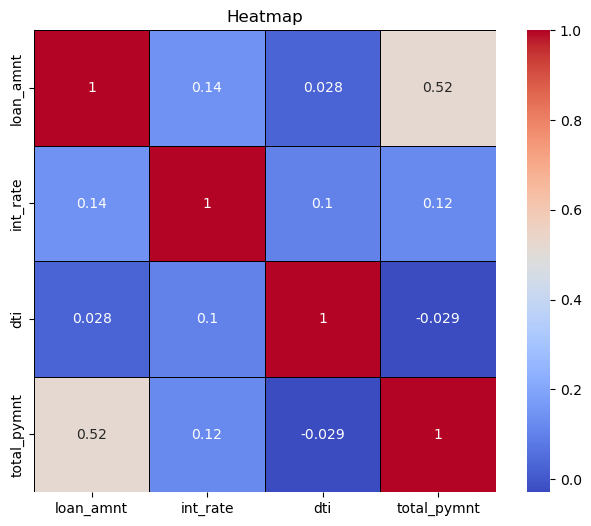

In [94]:
# Trực quan hóa ma trận tương quan
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_2, annot=True, cmap='coolwarm', square=True, linewidths=.5, linecolor='black')
plt.title('Heatmap')
plt.show()

## emp_length

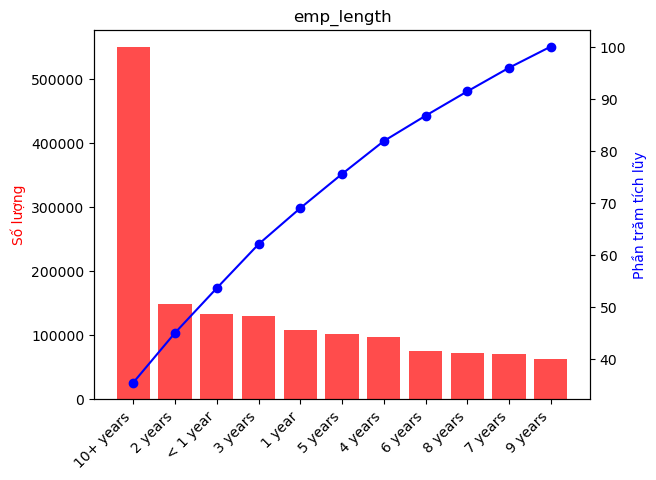

In [51]:
credit_counts = etl_data['emp_length'].value_counts()

# Sắp xếp DataFrame theo số lượng giảm dần
credit_counts = credit_counts.sort_values(ascending=False)

# Tính tổng số lượng
total = credit_counts.sum()

# Tính tổng tích lũy
cumulative_counts = credit_counts.cumsum()

# Tính phần trăm tích lũy
cumulative_percentage = (cumulative_counts / total) * 100

# Vẽ Pareto chart
fig, ax1 = plt.subplots()

# Vẽ cột cho số lượng
ax1.bar(credit_counts.index, credit_counts, color='r', alpha=0.7, align='center')

# Tạo trục phụ để vẽ đường tích lũy
ax2 = ax1.twinx()
ax2.plot(credit_counts.index, cumulative_percentage, color='b', marker='o')

# Đặt giảm kích thước font cho các nhãn trục
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha="right", fontsize=10)
plt.setp(ax2.yaxis.get_majorticklabels(), fontsize=10)

# Thiết lập nhãn và tiêu đề
ax1.set_ylabel('Số lượng', color='r')
ax2.set_ylabel('Phần trăm tích lũy', color='b')
plt.title('emp_length')

plt.show()

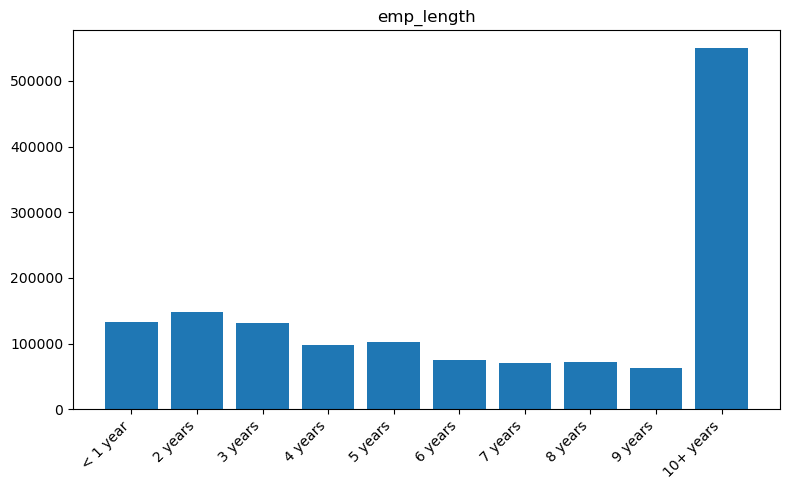

In [60]:
# Tính tần suất xuất hiện của mỗi giá trị
value_counts = etl_data['emp_length'].value_counts()

# Sắp xếp theo thứ tự A, B, C, D, E, F, G
order = ['< 1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
value_counts = value_counts.reindex(order)

# Vẽ biểu đồ cột với kích thước lớn hơn
plt.figure(figsize=(8, 5))  # Chọn kích thước phù hợp với nhu cầu của bạn

plt.bar(value_counts.index, value_counts)
plt.title('emp_length')
plt.xticks(rotation=45, ha='right')  # Xoay chữ trên trục x để tránh đè lên nhau
plt.tight_layout()  # Đảm bảo không bị cắt mất phần nội dung của biểu đồ
plt.show()

## home_ownership

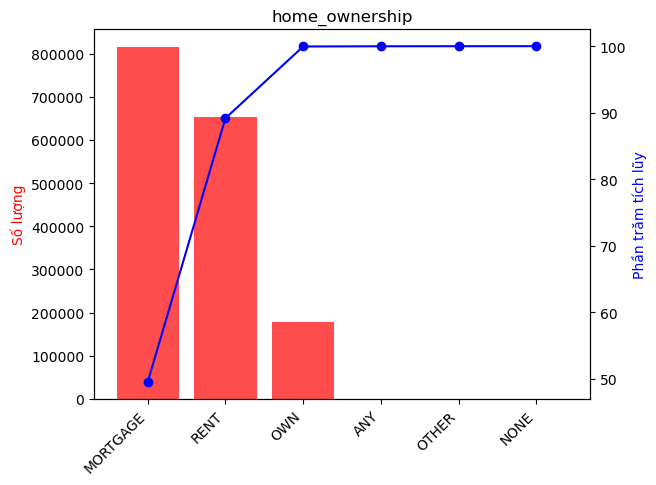

In [61]:
credit_counts = etl_data['home_ownership'].value_counts()

# Sắp xếp DataFrame theo số lượng giảm dần
credit_counts = credit_counts.sort_values(ascending=False)

# Tính tổng số lượng
total = credit_counts.sum()

# Tính tổng tích lũy
cumulative_counts = credit_counts.cumsum()

# Tính phần trăm tích lũy
cumulative_percentage = (cumulative_counts / total) * 100

# Vẽ Pareto chart
fig, ax1 = plt.subplots()

# Vẽ cột cho số lượng
ax1.bar(credit_counts.index, credit_counts, color='r', alpha=0.7, align='center')

# Tạo trục phụ để vẽ đường tích lũy
ax2 = ax1.twinx()
ax2.plot(credit_counts.index, cumulative_percentage, color='b', marker='o')

# Đặt giảm kích thước font cho các nhãn trục
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha="right", fontsize=10)
plt.setp(ax2.yaxis.get_majorticklabels(), fontsize=10)

# Thiết lập nhãn và tiêu đề
ax1.set_ylabel('Số lượng', color='r')
ax2.set_ylabel('Phần trăm tích lũy', color='b')
plt.title('home_ownership')

plt.show()

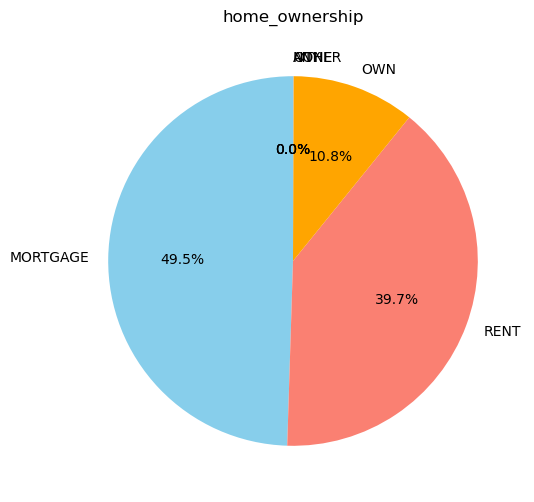

In [68]:
# Đếm số lượng kỳ hạn
term_counts = etl_data['home_ownership'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(6, 6))
plt.pie(term_counts, labels=term_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon', 'orange'])
plt.title('home_ownership')
plt.show()

In [70]:
count_any = (etl_data['home_ownership'] == 'ANY').sum()

print(count_any)

507


In [73]:
count_any = (etl_data['home_ownership'] == 'OTHER').sum()

print(count_any)

182


In [74]:
count_any = (etl_data['home_ownership'] == 'NONE').sum()

print(count_any)

54


## loan_status

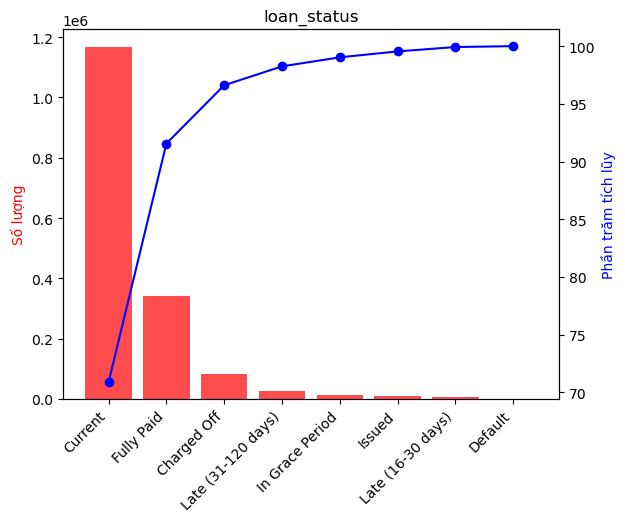

In [88]:
credit_counts = etl_data['loan_status'].value_counts()

# Sắp xếp DataFrame theo số lượng giảm dần
credit_counts = credit_counts.sort_values(ascending=False)

# Tính tổng số lượng
total = credit_counts.sum()

# Tính tổng tích lũy
cumulative_counts = credit_counts.cumsum()

# Tính phần trăm tích lũy
cumulative_percentage = (cumulative_counts / total) * 100

# Vẽ Pareto chart
fig, ax1 = plt.subplots()

# Vẽ cột cho số lượng
ax1.bar(credit_counts.index, credit_counts, color='r', alpha=0.7, align='center')

# Tạo trục phụ để vẽ đường tích lũy
ax2 = ax1.twinx()
ax2.plot(credit_counts.index, cumulative_percentage, color='b', marker='o')

# Đặt giảm kích thước font cho các nhãn trục
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha="right", fontsize=10)
plt.setp(ax2.yaxis.get_majorticklabels(), fontsize=10)

# Thiết lập nhãn và tiêu đề
ax1.set_ylabel('Số lượng', color='r')
ax2.set_ylabel('Phần trăm tích lũy', color='b')
plt.title('loan_status')

plt.show()

## purpose

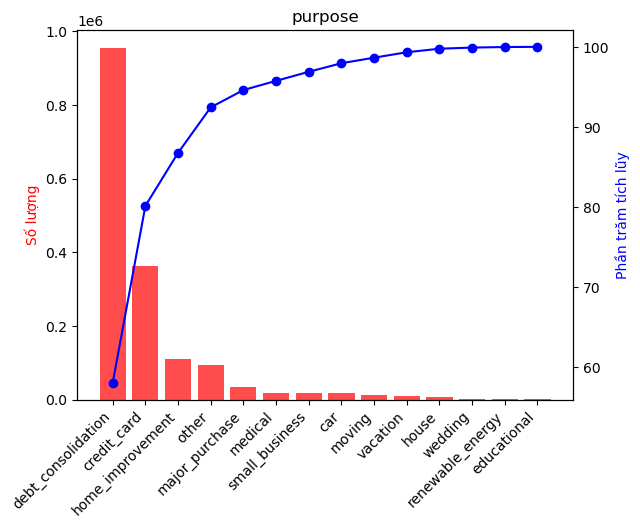

In [89]:
credit_counts = etl_data['purpose'].value_counts()

# Sắp xếp DataFrame theo số lượng giảm dần
credit_counts = credit_counts.sort_values(ascending=False)

# Tính tổng số lượng
total = credit_counts.sum()

# Tính tổng tích lũy
cumulative_counts = credit_counts.cumsum()

# Tính phần trăm tích lũy
cumulative_percentage = (cumulative_counts / total) * 100

# Vẽ Pareto chart
fig, ax1 = plt.subplots()

# Vẽ cột cho số lượng
ax1.bar(credit_counts.index, credit_counts, color='r', alpha=0.7, align='center')

# Tạo trục phụ để vẽ đường tích lũy
ax2 = ax1.twinx()
ax2.plot(credit_counts.index, cumulative_percentage, color='b', marker='o')

# Đặt giảm kích thước font cho các nhãn trục
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha="right", fontsize=10)
plt.setp(ax2.yaxis.get_majorticklabels(), fontsize=10)

# Thiết lập nhãn và tiêu đề
ax1.set_ylabel('Số lượng', color='r')
ax2.set_ylabel('Phần trăm tích lũy', color='b')
plt.title('purpose')

plt.show()

## addr_state

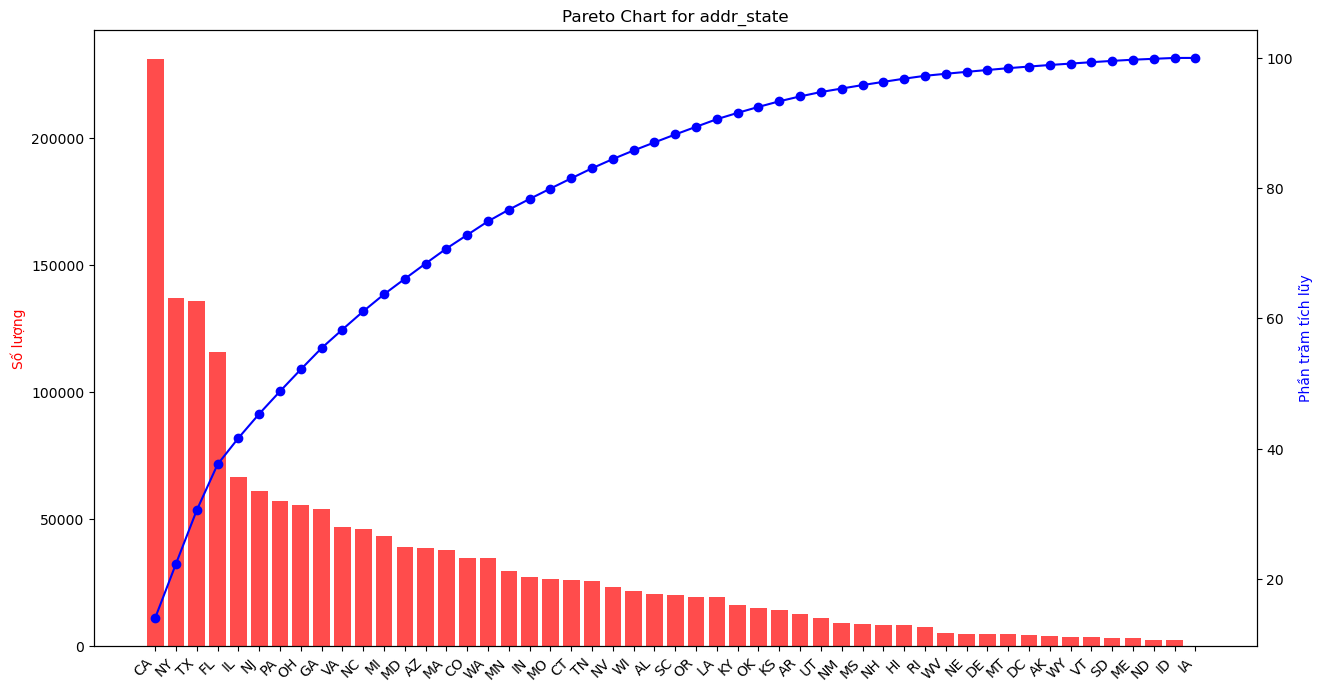

In [93]:
credit_counts = etl_data['addr_state'].value_counts()

# Sắp xếp DataFrame theo số lượng giảm dần
credit_counts = credit_counts.sort_values(ascending=False)

# Tính tổng số lượng
total = credit_counts.sum()

# Tính tổng tích lũy
cumulative_counts = credit_counts.cumsum()

# Tính phần trăm tích lũy
cumulative_percentage = (cumulative_counts / total) * 100

# Vẽ Pareto chart
fig, ax1 = plt.subplots(figsize=(15, 8))

# Vẽ cột cho số lượng
ax1.bar(credit_counts.index, credit_counts, color='r', alpha=0.7, align='center')

# Tạo trục phụ để vẽ đường tích lũy
ax2 = ax1.twinx()
ax2.plot(credit_counts.index, cumulative_percentage, color='b', marker='o')

# Đặt giảm kích thước font cho các nhãn trục
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha="right", fontsize=10)
plt.setp(ax2.yaxis.get_majorticklabels(), fontsize=10)

# Thiết lập nhãn và tiêu đề
ax1.set_ylabel('Số lượng', color='r')
ax2.set_ylabel('Phần trăm tích lũy', color='b')
plt.title('Pareto Chart for addr_state')

plt.show()

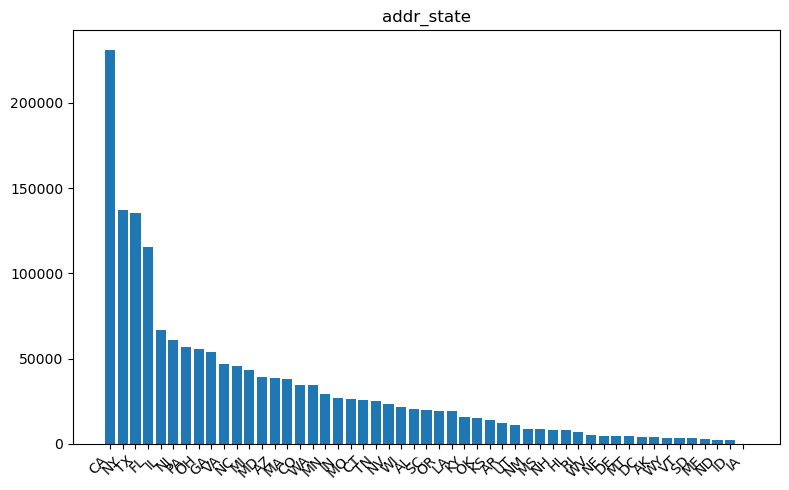

In [91]:
# Tính tần suất xuất hiện của mỗi giá trị
value_counts = etl_data['addr_state'].value_counts()

# Vẽ biểu đồ cột với kích thước lớn hơn
plt.figure(figsize=(8, 5))  # Chọn kích thước phù hợp với nhu cầu của bạn

plt.bar(value_counts.index, value_counts)
plt.title('addr_state')
plt.xticks(rotation=45, ha='right')  # Xoay chữ trên trục x để tránh đè lên nhau
plt.tight_layout()  # Đảm bảo không bị cắt mất phần nội dung của biểu đồ
plt.show()